Loading months: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


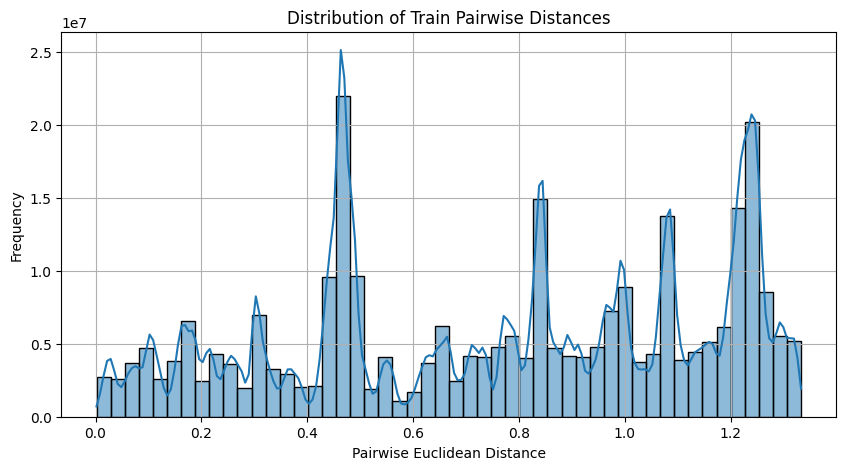

In [ ]:
import sys
import os

sys.path.append(os.path.dirname("/Users/mac/Desktop/train_delay_prediction/utils.py"))

from utils import *

data = load_data(percentage_of_data_usage=0.01)
X = data["X"]

columns_scheme = data["columns_scheme"]
features_config = indices_retrieval(columns_scheme)
pos_emb = compute_train_position_embedding(
    X, features_config["past_station_1_indices"], features_config["future_station_1_indices"]
)

distance_matrix = euclidean_distance_matrix(pos_emb)

distances = distance_matrix.flatten()
distances = distances[distances > 0]  # Remove self-distances (0)

plt.figure(figsize=(10, 5))
sns.histplot(distances, bins=50, kde=True)
plt.xlabel("Pairwise Euclidean Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Train Pairwise Distances")
plt.grid(True)
plt.show()

In [ ]:
p25, p50, p75, p90 = np.percentile(distances, [25, 50, 75, 90])

print(f"Suggested radii for testing:")
print(f"- Small interaction zone (25th percentile): {p25:.2f}")
print(f"- Medium congestion (50th percentile): {p50:.2f}")
print(f"- Larger area (75th percentile): {p75:.2f}")
print(f"- Extreme interaction (90th percentile): {p90:.2f}")

Suggested radii for testing:
- Small interaction zone (25th percentile): 0.46
- Medium congestion (50th percentile): 0.83
- Larger area (75th percentile): 1.11
- Extreme interaction (90th percentile): 1.24
